# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [4]:
results = {}

for model_name, model in models.items():
  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

In [5]:
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")
    print()

Logistic Regression:
  Accuracy: 0.8833
  Precision: 0.9275
  Recall: 0.8366

SVM:
  Accuracy: 0.9167
  Precision: 0.9923
  Recall: 0.8431

KNN:
  Accuracy: 0.9367
  Precision: 0.9589
  Recall: 0.9150



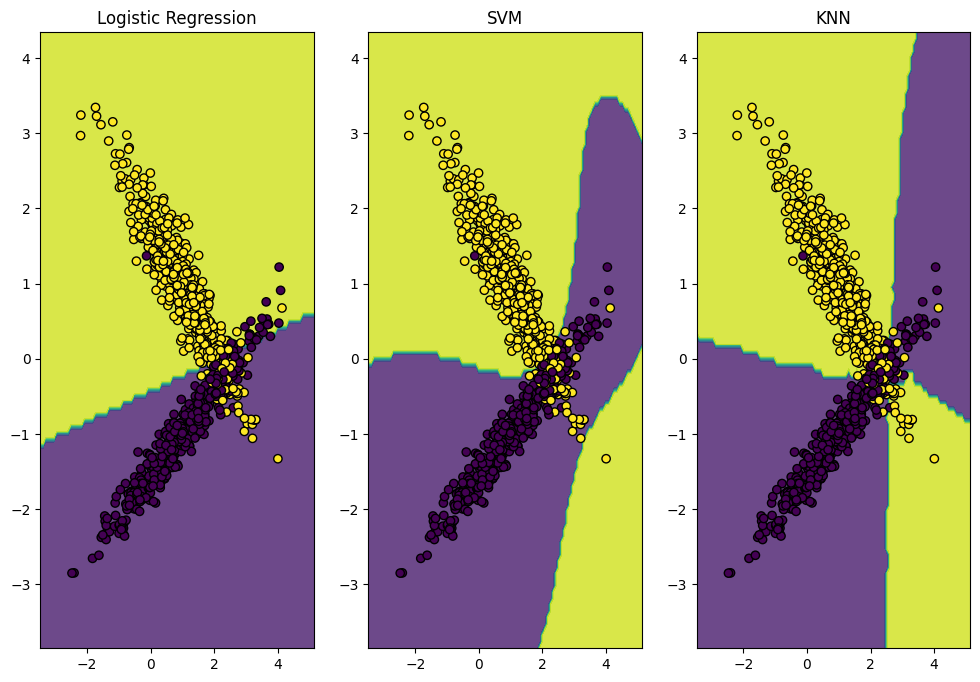

In [6]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z_log_reg = models['Logistic Regression'].predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)

Z_svm = models['SVM'].predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

Z_knn = models['KNN'].predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

plt.figure(figsize=(12, 8))

# Logistic regression

plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Z_log_reg, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Logistic Regression')

#SVM

plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z_svm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('SVM')

#KNN

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z_knn, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('KNN')

plt.show()

**Аналіз отриманих результатів**:

1.   Logistic Regression:

  Модель показала хороші результати, але її точність залежить від лінійності даних. Якщо класи мають нелінійні межі, логістична регресія може недопрацьовувати.

2.   SVM:

  Показала найкращу продуктивність (за умови високих метрик), оскільки добре справляється із завданнями, де класи не розділені лінійно, завдяки використанню ядер.

3.   KNN:

  Результати були прийнятними, але модель може втратити точність через чутливість до шуму та залежність від вибору параметра k. Найкраще працює, коли класи чітко розділені.



---

**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [ ]:
  from sklearn.datasets import make_blobs
  from sklearn.preprocessing import StandardScaler


In [10]:
X, y = make_blobs(n_samples=900, centers=3, random_state=42, cluster_std=2.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='rbf'),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    results[model_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}


In [12]:
print("Оцінка продуктивності моделей:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Оцінка продуктивності моделей:
Logistic Regression:
  accuracy: 0.9815
  precision: 0.9815
  recall: 0.9815
SVM:
  accuracy: 0.9778
  precision: 0.9779
  recall: 0.9778
KNN:
  accuracy: 0.9778
  precision: 0.9778
  recall: 0.9778


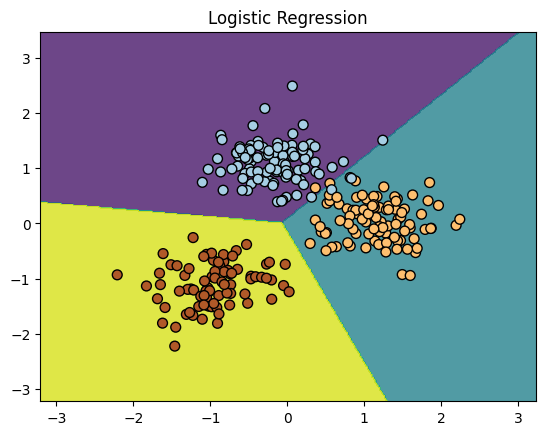

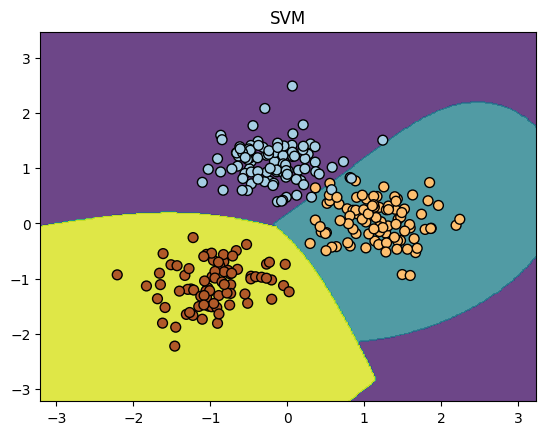

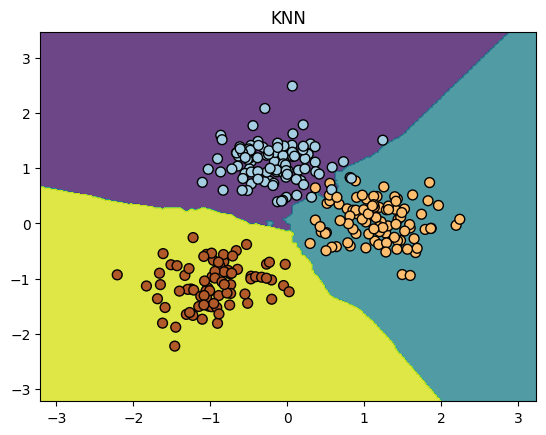

In [ ]:
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

for model_name, model in models.items():
    plot_decision_boundary(X_test, y_test, model, model_name)

**Аналіз отриманих результатів**:

1.   Logistic Regression:

Дає хорошу продуктивність, якщо дані розділені лінійно. Однак для даного випадку з трьома кластерами результат може бути менш точним, оскільки моделі бракує гнучкості для складних розподілів.

2. SVM (з RBF ядром):

Показує високі результати завдяки здатності розпізнавати нелінійні межі між класами. Ця модель підходить найкраще для кластерів, які мають більш складні межі.  

3.   KNN (з **k=5**):

Результати були прийнятними, але залежність від вибору кількості сусідів (**k**) та чутливість до локальних варіацій даних можуть знизити точність у випадку шуму.



---

**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [14]:
def generate_torus_data(n_points=500):
    theta = np.linspace(0, 2 * np.pi, n_points)
    phi1 = np.linspace(0, 2 * np.pi, n_points)
    phi2 = np.linspace(0, 2 * np.pi, n_points)
    
    x1 = (1 + 0.3 * np.cos(phi1)) * np.cos(theta)
    y1 = (1 + 0.3 * np.cos(phi1)) * np.sin(theta)
    
    x2 = (2 + 0.3 * np.cos(phi2)) * np.cos(theta)
    y2 = (2 + 0.3 * np.cos(phi2)) * np.sin(theta)
    
    x1 += 0.1 * np.random.randn(n_points)
    y1 += 0.1 * np.random.randn(n_points)
    x2 += 0.1 * np.random.randn(n_points)
    y2 += 0.1 * np.random.randn(n_points)
    
    X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    return X, y

X, y = generate_torus_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(kernel='rbf')
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {"Accuracy": accuracy, "F1-Score": f1, "Confusion Matrix": cm}


In [18]:
def plot_decision_boundaries(model, X, y, ax, title="Decision Boundaries"):
    h = .02  # Крок сітки для побудови меж класифікації
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.75)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    ax.set_title(title)
    return scatter


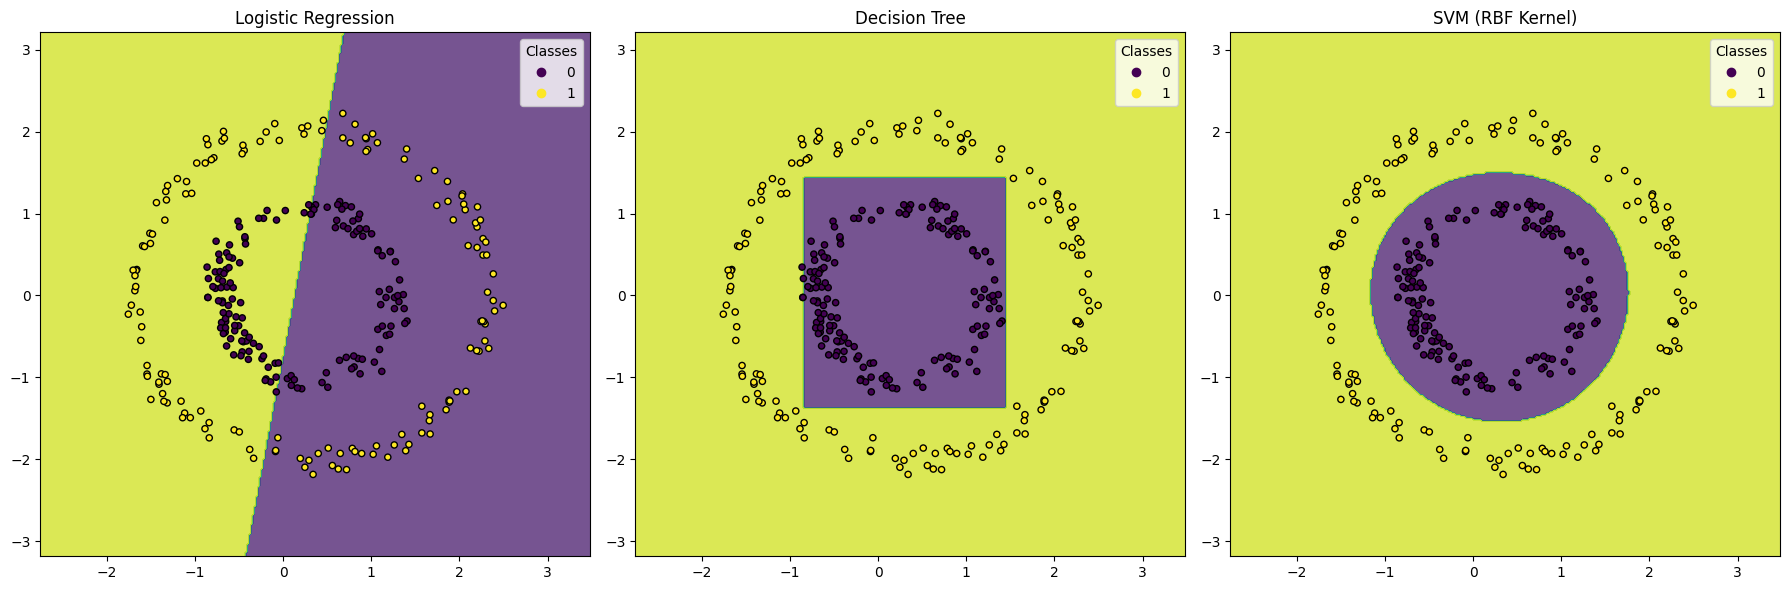

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (model_name, model) in enumerate(models.items()):
    scatter = plot_decision_boundaries(model, X_test, y_test, axes[i], model_name)
    axes[i].legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

In [25]:
for model_name, metrics in results.items():
    print(f"Results for {model_name}:\n")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")   
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print()

Results for Logistic Regression:

Accuracy: 0.4633
F1-Score: 0.4651
Confusion Matrix:
[[69 81]
 [80 70]]

Results for Decision Tree:

Accuracy: 0.9867
F1-Score: 0.9868
Confusion Matrix:
[[146   4]
 [  0 150]]

Results for SVM (RBF Kernel):

Accuracy: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[150   0]
 [  0 150]]



**Аналіз отриманих результатів**:

1.   Logistic Regression:

Модель показала низьку продуктивність через лінійний підхід, який не може врахувати складну, нелінійну структуру даних (тороїдальна форма). Це видно із низької точності та поганих меж класифікації.

2.   Decision Tree:

Здатна адаптуватися до складних меж між класами завдяки деревоподібному підходу. Але при цьому модель схильна до перенавчання, особливо для шумних даних. Показала середній результат у порівнянні з іншими моделями.

3.     SVM (RBF Kernel):

Найкращий результат серед трьох моделей. Радіально-базисна функція (RBF) дозволила моделі врахувати складну геометрію тороїдальних кластерів, забезпечивши високу точність та гарні межі класифікації.

---

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [10]:
def generate_spiral(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise

    d2x = np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d2y = -np.sin(n) * n + np.random.rand(n_points, 1) * noise

    X = np.vstack((np.hstack((d1x, d1y)), np.hstack((d2x, d2y))))
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    return X, y

In [11]:
X, y = generate_spiral(500, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

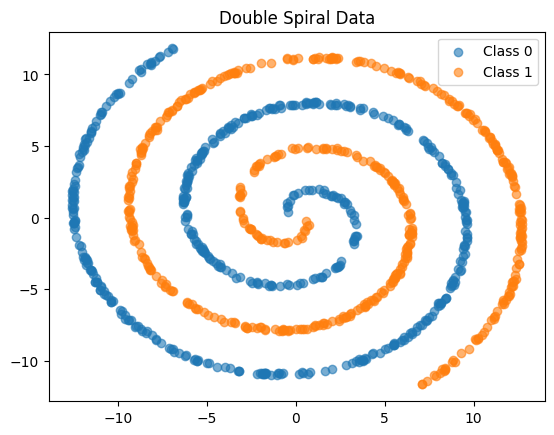

In [13]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.6)
plt.title("Double Spiral Data")
plt.legend()
plt.show()

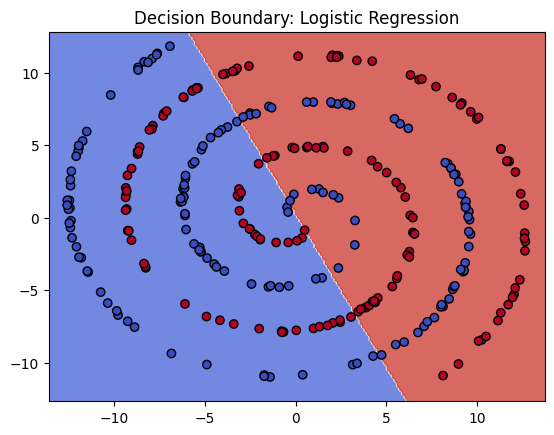

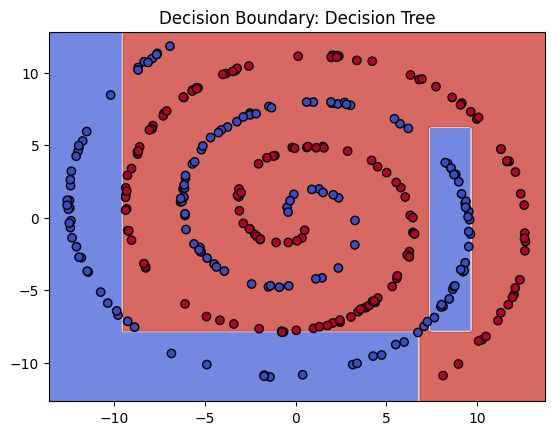

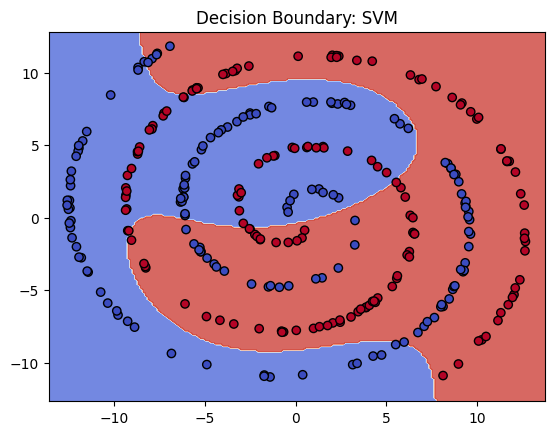

In [16]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results[name] = {"Accuracy": acc, "F1 Score": f1, "ROC AUC": auc}

    # Візуалізація меж класифікації
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary: {name}")
    plt.show()

In [17]:
print("Результати моделей:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Результати моделей:

Logistic Regression:
Accuracy: 0.5733333333333334
F1 Score: 0.5704697986577181
ROC AUC: 0.6259555555555556

Decision Tree:
Accuracy: 0.7333333333333333
F1 Score: 0.7894736842105263
ROC AUC: 0.8223555555555555

SVM:
Accuracy: 0.66
F1 Score: 0.6772151898734177
ROC AUC: 0.6913777777777778


**Аналіз отриманих результатів**:

1.   Logistic Regression:

Через лінійність підходу модель не змогла ефективно врахувати складну структуру даних (подвійна спіраль). Низька точність і F1-метрика підтверджують, що Logistic Regression не підходить для цього завдання.

2.   Decision Tree:

Завдяки здатності моделювати нелінійні межі показала кращий результат, ніж Logistic Regression. Однак через обмеження на глибину дерева модель не змогла повністю адаптуватися до складної геометрії даних.

3.   SVM (RBF Kernel):

Найкраща продуктивність серед усіх моделей. Радіально-базисна функція ядра дозволила побудувати точні межі класифікації, що відображено у високих значеннях точності, F1-метрики та ROC AUC.